In [1]:
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from itertools import cycle
import matplotlib.pyplot as plt
from numpy import interp
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
import os
import xgboost as xgb
from sklearn.preprocessing import label_binarize

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def plotROC(n_classes,y_test,y_score):
    # 计算
    fpr, tpr, thread = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    # 绘图
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('roc.png',)
    plt.show()

# 计算准确率
def calculate_all_prediction(confMatrix):
    '''
    计算总精度,对角线上所有值除以总数
    :return:
    '''
    total_sum = confMatrix.sum()
    correct_sum = (np.diag(confMatrix)).sum()
    prediction = round(100 * float(correct_sum) / float(total_sum), 2)
    print('准确率:' + str(prediction) + '%')


def calculae_lable_prediction(confMatrix):
    '''
    计算每一个类别的预测精度:该类被预测正确的数除以该类的总数
    '''
    l = len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=1)[i]
        label_correct_sum = confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('精确率: {0} : {1} %'.format(i, prediction))

def calculate_label_recall(confMatrix):
    l = len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=0)[i]
        label_correct_sum = confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('召回率: {0} : {1} %'.format(i, prediction))

In [3]:
file = '代谢组数据 - 填充 by min - 副本1.csv'
df = pd.read_csv(file,engine='python')
features=df.columns.tolist()

feat_labels = df.columns[5:]
X=df[features[6:]]
y=df[features[4]]


pd.DataFrame(y)
pd.DataFrame(X)

,Pyridoxamine,Pyroglutamic acid,Serine,Stearoylcarnitine,Taurine,Threonine,Trigonelline,Trimethylamine-N-oxide,Tryptophan,Tyrosine,...,GlcCer(d18:1/24:0),GlcCer(d18:1/16:0),Glucosylsphingosine,GlcCer(d18:2/18:0),GlcCer(d18:2/20:0),GlcCer(d18:1/18:0),GlcCer(d18:1/22:1),GalCer(d18:1/16:0),GalCer(d18:2/20:0),GalCer(d18:2/18:0)
0,0.386372,4.439822,12.203752,0.004416,0.183362,9.849501,4.184259,1.483083,0.236850,0.021520,...,0.125182,0.439909,0.003513,0.011922,0.016582,0.035013,0.023859,0.067132,0.006443,0.005938
1,0.423539,5.851551,11.493877,0.006867,0.180818,10.510558,1.460301,1.391092,0.254664,0.025265,...,0.133054,0.408712,0.004259,0.010649,0.016358,0.031509,0.013460,0.047338,0.003426,0.002022
2,0.384690,2.603791,7.777585,0.004890,0.257987,10.421462,1.729223,1.996201,0.193602,0.015359,...,0.134955,0.489322,0.002378,0.012418,0.018256,0.043480,0.022773,0.067491,0.005557,0.003623
3,0.525711,1.704007,5.750401,0.004696,0.218338,6.333874,0.419803,2.015289,0.191359,0.023564,...,0.157644,0.226438,0.001161,0.006708,0.007026,0.028222,0.008586,0.031376,0.002716,0.002063
4,0.404378,2.406389,9.358340,0.006404,0.203785,9.074605,0.236320,1.133217,0.225157,0.019728,...,0.165509,0.558259,0.003790,0.011599,0.016112,0.038351,0.022735,0.076472,0.007723,0.005492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.455111,2.994012,15.430115,0.006630,0.179912,11.842883,0.398977,1.650817,0.158157,0.027622,...,0.124693,0.372365,0.007826,0.007985,0.012993,0.029784,0.012644,0.052377,0.008637,0.005426
299,0.390668,3.554219,12.847732,0.004817,0.233782,15.193678,1.645585,1.239799,0.240920,0.026966,...,0.117908,0.348453,0.003859,0.004852,0.010252,0.021857,0.007569,0.151555,0.006930,0.003423
300,0.475836,4.242542,11.081331,0.006427,0.169853,16.453918,2.281204,1.903889,0.174362,0.014941,...,0.034226,0.116415,0.010260,0.000681,0.000833,0.004665,0.002210,0.036334,0.000618,0.000694
301,0.308284,3.520729,12.981925,0.007905,0.192906,11.699659,1.851143,1.146580,0.167807,0.017373,...,0.158299,0.514225,0.004606,0.009526,0.013358,0.046152,0.018665,0.072062,0.003888,0.004825


RF-RFE
#

In [4]:
# RFECV


from sklearn.svm import SVC

forest = RandomForestClassifier(criterion='gini',n_estimators=200,random_state=1,n_jobs=2,verbose=1)

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=forest,  # 学习器
              min_features_to_select=2,  # 最小选择的特征数量
              step=1,  # 移除特征个数
              cv=StratifiedKFold(10),  # 交叉验证次数
              scoring='accuracy',  # 学习器的评价标准
              verbose=0,
              n_jobs=-1
              ).fit(X, y)
X_RFECV = rfecv.transform(X)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("有效特征个数 : %d" % rfecv.n_features_)
print("全部特征等级 : %s" % list(rfecv.ranking_))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      |

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s f

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      |

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

RFECV特征选择结果——————————————————————————————————————————————————
有效特征个数 : 16
全部特征等级 : [25, 111, 109, 46, 148, 91, 44, 87, 92, 133, 40, 169, 118, 142, 196, 31, 180, 96, 1, 110, 98, 74, 95, 8, 188, 207, 127, 151, 161, 38, 12, 100, 163, 173, 83, 132, 32, 55, 82, 13, 202, 194, 58, 85, 6, 125, 80, 75, 10, 9, 27, 124, 1, 4, 52, 106, 2, 11, 1, 1, 1, 1, 50, 60, 115, 88, 177, 1, 1, 1, 51, 90, 157, 67, 159, 70, 216, 197, 193, 21, 211, 101, 122, 178, 114, 72, 119, 136, 81, 185, 179, 208, 66, 123, 129, 43, 175, 24, 167, 183, 184, 16, 5, 7, 164, 182, 63, 42, 220, 174, 19, 76, 30, 112, 120, 33, 45, 145, 166, 3, 172, 117, 103, 17, 150, 222, 89, 192, 204, 139, 41, 102, 93, 37, 200, 190, 48, 212, 199, 126, 131, 189, 191, 195, 34, 186, 28, 155, 168, 108, 94, 73, 22, 137, 147, 170, 116, 146, 1, 1, 198, 181, 205, 104, 140, 35, 203, 152, 56, 15, 210, 144, 71, 1, 128, 160, 107, 215, 121, 79, 209, 49, 187, 29, 36, 201, 105, 64, 47, 149, 68, 59, 86, 218, 69, 206, 134, 113, 217, 65, 99, 130, 219, 14, 158, 165, 54

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


In [5]:
selected_features = X.columns[rfecv.support_]
print(list(selected_features))
print("交叉验证得分————————————————————————————————————————————")
print(rfecv.cv_results_["mean_test_score"])
U=X[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(U, y, test_size=0.2)

['Cystine', 'Histamine', 'Ascorbate', 'Dopa', 'Dopamine 4-o-sulfate', 'Putrescine', 'Erythose 4-phosphate', '3-Hydroxybutyric acid', 'Oxoglutaric acid', 'MG(18:0)', 'LPC(26:1)', 'LPE(18:0)', 'LPG(18:0)', 'PA(18:1/18:1)', 'LPG(16:0)', 'PG(16:0_20:4)']
交叉验证得分————————————————————————————————————————————
[0.92064516 0.95064516 0.96053763 0.96698925 0.97032258 0.97032258
 0.96376344 0.95731183 0.96376344 0.96053763 0.95709677 0.9572043
 0.95709677 0.96043011 0.97032258 0.96043011 0.9572043  0.96043011
 0.96376344 0.96365591 0.96365591 0.96709677 0.96053763 0.96387097
 0.96053763 0.9572043  0.96376344 0.95709677 0.96376344 0.96043011
 0.96043011 0.95709677 0.95709677 0.96053763 0.96053763 0.96043011
 0.96709677 0.95387097 0.96043011 0.96043011 0.9572043  0.95376344
 0.95376344 0.96376344 0.95387097 0.95387097 0.95387097 0.96043011
 0.9572043  0.95376344 0.95053763 0.95709677 0.95053763 0.96043011
 0.95387097 0.95064516 0.95053763 0.95387097 0.95376344 0.96053763
 0.95376344 0.95376344 0.9505

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      |

特征排序结果——————————————————————————————————————————————————
 1) Putrescine                     0.530806
 2) Erythose 4-phosphate           0.105463
 3) MG(18:0)                       0.092827
 4) Histamine                      0.066788
 5) Cystine                        0.046448
 6) LPE(18:0)                      0.024597
 7) 3-Hydroxybutyric acid          0.023962
 8) PG(16:0_20:4)                  0.018371
 9) LPG(16:0)                      0.017701
10) LPG(18:0)                      0.014967
11) PA(18:1/18:1)                  0.013914
12) Oxoglutaric acid               0.013527
13) LPC(26:1)                      0.009889
14) Ascorbate                      0.009004
15) Dopa                           0.008664
16) Dopamine 4-o-sulfate           0.003072
准确率:98.36%
精确率: 0 : 97.56 %
精确率: 1 : 100.0 %
召回率: 0 : 100.0 %
召回率: 1 : 95.24 %


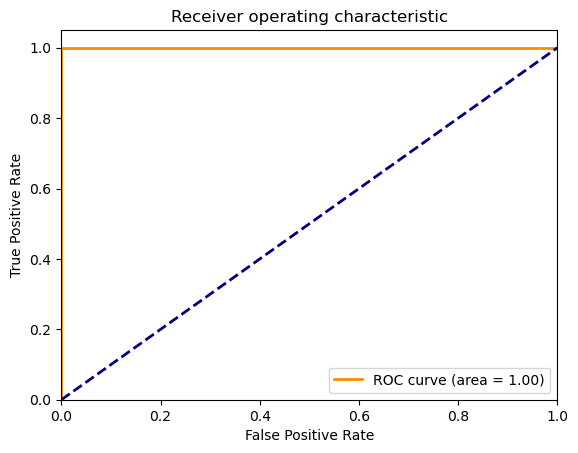

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 174 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 200

交叉验证得分：
[0.96       0.92       1.         0.95833333 0.95833333 0.875
 0.91666667 0.91666667 1.         0.875     ]
0.9380000000000001


[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished


In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini',max_features=25,n_estimators=200,random_state=1,n_jobs=2,verbose=1)
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("特征排序结果——————————————————————————————————————————————————")
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # 下标排序
for f in range(X_train.shape[1]):   # x_train.shape[1]=13
    print("%2d) %-*s %f" % \
          (f + 1, 30, selected_features[indices[f]], importances[indices[f]]))
predictions=model.predict(X_test)
cm = confusion_matrix(y_true=Y_test, y_pred=predictions)
calculate_all_prediction(cm)
calculae_lable_prediction(cm)
calculate_label_recall(cm)
y_score = model.predict_proba(X_test)
plotROC(3,Y_test,y_score[:,1])

scores = cross_val_score(model, X_train, Y_train, cv=10)  #cv为迭代次数。
print("交叉验证得分：")
print(scores)
print(scores.mean())

XGB-RFE#

In [7]:
# RFECV
import xgboost as xgb

model = xgb.XGBClassifier( learning_rate =0.1,
 n_estimators=200,
 max_depth=5)

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=model,  # 学习器
              min_features_to_select=2,  # 最小选择的特征数量
              step=1,  # 移除特征个数
              cv=StratifiedKFold(10),  # 交叉验证次数
              scoring='accuracy',  # 学习器的评价标准
              verbose=0,
              n_jobs=-1
              ).fit(X, y)
X_RFECV = rfecv.transform(X)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("有效特征个数 : %d" % rfecv.n_features_)
print("全部特征等级 : %s" % list(rfecv.ranking_))

RFECV特征选择结果——————————————————————————————————————————————————
有效特征个数 : 13
全部特征等级 : [70, 74, 63, 95, 94, 75, 89, 92, 101, 103, 105, 26, 110, 112, 85, 115, 117, 119, 2, 123, 125, 19, 50, 3, 134, 133, 127, 60, 32, 137, 45, 141, 83, 145, 147, 149, 34, 153, 155, 157, 64, 31, 47, 28, 8, 46, 1, 36, 68, 61, 84, 90, 1, 79, 78, 189, 77, 81, 1, 197, 1, 1, 23, 205, 207, 209, 211, 1, 27, 42, 82, 220, 223, 222, 113, 136, 138, 49, 37, 66, 142, 144, 146, 148, 150, 39, 152, 154, 156, 158, 140, 160, 111, 162, 109, 164, 165, 1, 168, 170, 172, 1, 30, 178, 180, 182, 184, 7, 190, 192, 57, 1, 17, 202, 212, 5, 216, 224, 225, 18, 221, 59, 16, 71, 185, 186, 25, 188, 191, 193, 40, 195, 194, 41, 80, 44, 93, 98, 21, 206, 208, 210, 213, 204, 14, 175, 218, 86, 102, 65, 48, 24, 104, 106, 10, 58, 114, 116, 1, 35, 118, 20, 120, 72, 54, 13, 122, 29, 62, 56, 33, 124, 87, 1, 9, 126, 128, 130, 132, 1, 55, 166, 173, 51, 176, 179, 196, 198, 214, 217, 219, 53, 215, 76, 203, 201, 199, 200, 187, 183, 181, 177, 174, 12, 163, 171

In [8]:
selected_features = X.columns[rfecv.support_]
print(list(selected_features))
print("交叉验证得分————————————————————————————————————————————")
print(rfecv.cv_results_["mean_test_score"])
U=X[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(U, y, test_size=0.2)

['3-Methoxytyrosine', 'Histamine', 'Ascorbate', 'Dopamine 4-o-sulfate', 'Putrescine', 'Erythose 4-phosphate', 'LacCer(d18:1/16:0)', 'LPC(16:0)', 'PC(16:0/9:0(CHO))', 'MG(18:0)', 'LPE(18:0)', 'PE(O-18:0/22:6)', 'PG(16:0_20:4)']
交叉验证得分————————————————————————————————————————————
[0.90462366 0.93408602 0.95408602 0.94419355 0.95397849 0.94419355
 0.95064516 0.95387097 0.94731183 0.95731183 0.95419355 0.96075269
 0.95075269 0.95397849 0.95075269 0.93763441 0.93763441 0.93763441
 0.94419355 0.93752688 0.93752688 0.94397849 0.94397849 0.94086022
 0.93752688 0.94086022 0.94086022 0.94086022 0.93763441 0.93430108
 0.94086022 0.94075269 0.94075269 0.94075269 0.93741935 0.94075269
 0.93419355 0.93419355 0.93752688 0.93752688 0.94075269 0.94075269
 0.94408602 0.94408602 0.94075269 0.94075269 0.93741935 0.94075269
 0.93741935 0.93741935 0.94075269 0.93741935 0.93741935 0.94075269
 0.94075269 0.94075269 0.94075269 0.93741935 0.93419355 0.93419355
 0.93419355 0.93419355 0.93752688 0.93752688 0.93752

特征排序结果——————————————————————————————————————————————————
 1) Putrescine                     0.345087
 2) Erythose 4-phosphate           0.196401
 3) PG(16:0_20:4)                  0.089884
 4) MG(18:0)                       0.078217
 5) Histamine                      0.060953
 6) Dopamine 4-o-sulfate           0.051109
 7) PC(16:0/9:0(CHO))              0.038760
 8) Ascorbate                      0.038015
 9) 3-Methoxytyrosine              0.028285
10) LPE(18:0)                      0.023340
11) PE(O-18:0/22:6)                0.021694
12) LPC(16:0)                      0.018280
13) LacCer(d18:1/16:0)             0.009975
准确率:96.72%
精确率: 0 : 97.14 %
精确率: 1 : 96.15 %
召回率: 0 : 97.14 %
召回率: 1 : 96.15 %


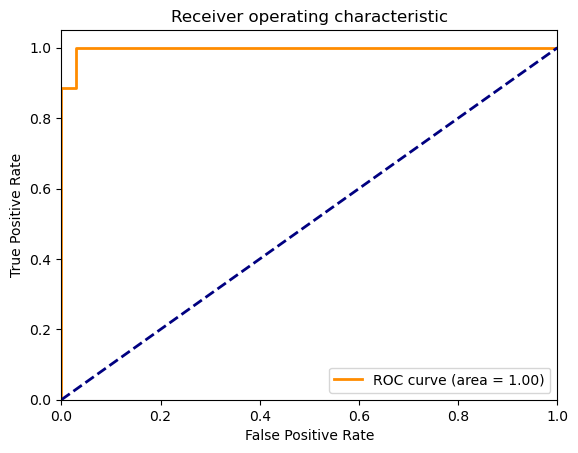

交叉验证得分：
[0.92       0.92       0.91666667 0.95833333 0.91666667 1.
 0.95833333 0.95833333 0.95833333 0.95833333]
0.9465


In [9]:
model = xgb.XGBClassifier( learning_rate =0.1,
 n_estimators=200,
 max_depth=5)

model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("特征排序结果——————————————————————————————————————————————————")
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # 下标排序
for f in range(X_train.shape[1]):   # x_train.shape[1]=13
    print("%2d) %-*s %f" % \
          (f + 1, 30, selected_features[indices[f]], importances[indices[f]]))
predictions=model.predict(X_test)
cm = confusion_matrix(y_true=Y_test, y_pred=predictions)
calculate_all_prediction(cm)
calculae_lable_prediction(cm)
calculate_label_recall(cm)
y_score = model.predict_proba(X_test)
plotROC(3,Y_test,y_score[:,1])

scores = cross_val_score(model, X_train, Y_train, cv=10)  #cv为迭代次数。
print("交叉验证得分：")
print(scores)
print(scores.mean())

SVM-RFE#

In [10]:
# RFECV
from sklearn import svm

model = svm.SVC(kernel = 'linear')

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=model,  # 学习器
              min_features_to_select=2,  # 最小选择的特征数量
              step=1,  # 移除特征个数
              cv=StratifiedKFold(10),  # 交叉验证次数
              scoring='accuracy',  # 学习器的评价标准
              verbose=0,
              n_jobs=-1
              ).fit(X, y)
X_RFECV = rfecv.transform(X)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("有效特征个数 : %d" % rfecv.n_features_)
print("全部特征等级 : %s" % list(rfecv.ranking_))

RFECV特征选择结果——————————————————————————————————————————————————
有效特征个数 : 48
全部特征等级 : [136, 1, 55, 98, 1, 57, 102, 85, 56, 171, 1, 9, 109, 134, 154, 143, 2, 157, 111, 106, 60, 31, 1, 1, 188, 125, 110, 100, 93, 159, 1, 169, 177, 172, 94, 147, 103, 75, 51, 73, 1, 139, 165, 148, 124, 129, 52, 135, 180, 168, 59, 178, 20, 70, 65, 175, 38, 67, 119, 131, 71, 1, 155, 40, 61, 34, 184, 4, 123, 1, 24, 133, 173, 151, 153, 156, 1, 1, 82, 120, 1, 152, 132, 101, 118, 1, 17, 113, 29, 87, 1, 35, 1, 95, 88, 107, 1, 10, 126, 46, 62, 28, 1, 19, 1, 37, 76, 174, 164, 116, 1, 86, 160, 18, 27, 13, 90, 42, 6, 1, 54, 1, 105, 112, 8, 3, 5, 69, 49, 1, 66, 141, 7, 1, 130, 170, 23, 25, 79, 145, 1, 92, 64, 99, 1, 16, 1, 58, 72, 176, 1, 161, 183, 1, 189, 149, 186, 21, 121, 181, 39, 97, 33, 1, 1, 1, 137, 146, 138, 44, 1, 1, 36, 1, 30, 185, 1, 84, 78, 1, 1, 80, 1, 1, 43, 45, 32, 1, 1, 1, 1, 127, 26, 1, 11, 1, 22, 114, 1, 1, 150, 12, 122, 15, 167, 190, 108, 142, 182, 115, 41, 162, 158, 89, 96, 179, 74, 81, 166, 47, 77, 117

In [11]:
selected_features = X.columns[rfecv.support_]
print(list(selected_features))
print("交叉验证得分————————————————————————————————————————————")
print(rfecv.cv_results_["mean_test_score"])
U=X[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(U, y, test_size=0.2)

['Pyroglutamic acid', 'Taurine', 'Uridine', 'Piperine', 'Sarcosine', 'Histidine', '5-Hydroxytryptophan', 'Putrescine', 'Oxoglutaric acid', 'Cer(d18:1/16:0)', 'Cer(d18:1/18:0)', 'Cholesteryl hexoside', 'DG(18:0_20:4)', 'GB3(d18:1/24:0)', 'HexCer(d18:1/16:0)', 'HexCer(d18:1/24:1)', 'LPC(16:1)', 'LPC(18:1)', 'PC(16:0/5:0(CHO))', 'PC(40:5)', 'PC(O-16:0/0:0)', 'PE(38:5)', 'PE(40:7)', 'TG(18:1_34:3)', 'TG(20:4_36:2)', 'TG(22:6_36:2)', 'Sitosteryl hexoside', '7-keto-Cholesterol', '(3-O-sulfo)GalCer(d18:1/24:0(2OH))', '(3-O-sulfo)GalCer(d18:1/24:0)', '(3-O-sulfo)GalCer(d18:1/24:1(2OH))', 'GM3(d34:1)', 'GM3(d36:1)', 'LPE(18:0)', 'PE(O-16:0/20:4)', 'PE(O-18:0/22:6)', 'PE(P-16:0/20:4)', 'PE(P-16:0/22:4)', 'PE(P-16:0/22:6)', 'PE(P-18:0/20:5)', 'PE(P-18:0/22:6)', 'PE(P-18:1/20:4)', 'PE(P-18:1/22:6)', 'PI(16:0_18:1)', 'PI(16:0_22:6)', 'PI(18:0_22:6)', 'PI(18:1/18:1)', 'GlcCer(d18:1/24:1)']
交叉验证得分————————————————————————————————————————————
[0.60408602 0.59086022 0.60086022 0.60397849 0.63032258 0.63

特征排序结果——————————————————————————————————————————————————
(48,)
(48,)
 1) LPC(16:1)                      1.735650
 2) GM3(d36:1)                     1.627111
 3) Putrescine                     1.577283
 4) TG(22:6_36:2)                  1.274827
 5) (3-O-sulfo)GalCer(d18:1/24:1(2OH)) 1.104381
 6) Oxoglutaric acid               1.092371
 7) PI(16:0_18:1)                  1.087205
 8) GlcCer(d18:1/24:1)             1.075939
 9) Cer(d18:1/18:0)                0.995746
10) PI(18:0_22:6)                  0.986327
11) Piperine                       0.945147
12) Cer(d18:1/16:0)                0.856045
13) (3-O-sulfo)GalCer(d18:1/24:0)  0.833280
14) TG(20:4_36:2)                  0.809775
15) Sarcosine                      0.798321
16) (3-O-sulfo)GalCer(d18:1/24:0(2OH)) 0.793517
17) 7-keto-Cholesterol             0.747395
18) 5-Hydroxytryptophan            0.730230
19) PE(P-16:0/22:6)                0.710749
20) Taurine                        0.695989
21) PE(P-16:0/22:4)                0.672889

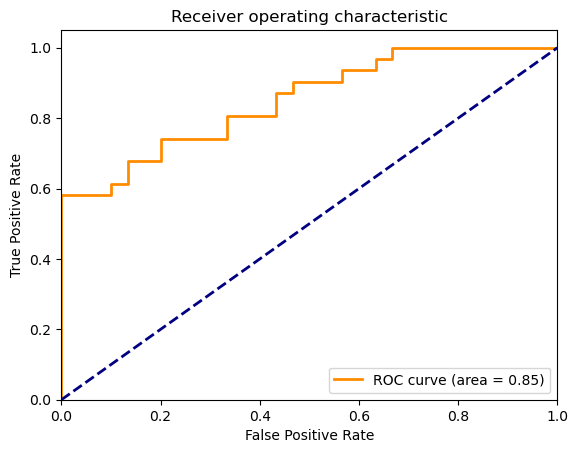

交叉验证得分：
[0.72       0.72       0.83333333 0.83333333 0.625      0.66666667
 0.66666667 0.58333333 0.75       0.75      ]
0.7148333333333333


In [12]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("特征排序结果——————————————————————————————————————————————————")
coef = model.coef_
coef = np.abs(coef)
importances = np.sum(coef, axis=0)
indices = np.argsort(importances)[::-1] # 下标排序
print(importances.shape)
print(indices.shape)
for f in range(X_train.shape[1]):   # x_train.shape[1]=13
    print("%2d) %-*s %f" % \
          (f + 1, 30, selected_features[indices[f]], importances[indices[f]]))
predictions=model.predict(X_test)
cm = confusion_matrix(y_true=Y_test, y_pred=predictions)
calculate_all_prediction(cm)
calculae_lable_prediction(cm)
calculate_label_recall(cm)
y_score = model.decision_function(X_test)
plotROC(3,Y_test,y_score)

scores = cross_val_score(model, X_train, Y_train, cv=10)  #cv为迭代次数。
print("交叉验证得分：")
print(scores)
print(scores.mean())

GBM-RFE#

In [13]:
# RFECV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=model,  # 学习器
              min_features_to_select=2,  # 最小选择的特征数量
              step=1,  # 移除特征个数
              cv=StratifiedKFold(10),  # 交叉验证次数
              scoring='accuracy',  # 学习器的评价标准
              verbose=0,
              n_jobs=-1
              ).fit(X, y)
X_RFECV = rfecv.transform(X)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("有效特征个数 : %d" % rfecv.n_features_)
print("全部特征等级 : %s" % list(rfecv.ranking_))

RFECV特征选择结果——————————————————————————————————————————————————
有效特征个数 : 7
全部特征等级 : [211, 204, 99, 113, 186, 118, 136, 77, 189, 103, 128, 5, 35, 78, 133, 28, 104, 97, 1, 32, 105, 92, 199, 14, 228, 148, 120, 91, 190, 20, 100, 151, 153, 37, 200, 106, 11, 36, 140, 132, 221, 31, 96, 46, 131, 39, 83, 139, 172, 155, 88, 169, 1, 9, 115, 117, 12, 219, 162, 86, 23, 1, 89, 208, 220, 226, 180, 1, 45, 135, 156, 179, 157, 158, 71, 173, 213, 207, 51, 62, 167, 69, 147, 25, 141, 63, 90, 111, 201, 22, 80, 165, 112, 138, 40, 41, 19, 1, 122, 166, 16, 57, 164, 48, 108, 3, 210, 55, 170, 18, 75, 225, 70, 152, 116, 2, 198, 223, 231, 203, 119, 184, 192, 187, 94, 163, 8, 143, 49, 53, 125, 42, 74, 93, 81, 52, 217, 124, 149, 44, 110, 65, 72, 67, 127, 38, 30, 34, 175, 142, 109, 137, 171, 82, 27, 98, 154, 134, 1, 212, 230, 195, 188, 206, 183, 174, 215, 196, 181, 76, 87, 29, 159, 50, 129, 222, 216, 176, 197, 47, 107, 214, 21, 185, 33, 17, 64, 79, 209, 66, 191, 205, 58, 145, 168, 182, 101, 73, 54, 218, 61, 15, 121, 85

In [14]:
selected_features = X.columns[rfecv.support_]
print(list(selected_features))
print("交叉验证得分————————————————————————————————————————————")
print(rfecv.cv_results_["mean_test_score"])
U=X[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(U, y, test_size=0.2)

['Cystine', 'Histamine', 'Putrescine', 'Erythose 4-phosphate', 'LacCer(d18:1/16:0)', 'MG(18:0)', 'EPA']
交叉验证得分————————————————————————————————————————————
[0.89827957 0.92107527 0.90795699 0.92096774 0.92419355 0.93408602
 0.93075269 0.91419355 0.92419355 0.91096774 0.9044086  0.91763441
 0.92752688 0.91086022 0.89763441 0.90107527 0.90086022 0.89408602
 0.90075269 0.89763441 0.91086022 0.90774194 0.9011828  0.91419355
 0.91430108 0.92096774 0.91086022 0.91419355 0.92086022 0.91430108
 0.92096774 0.91096774 0.93086022 0.92419355 0.90763441 0.91086022
 0.92086022 0.91419355 0.92086022 0.92086022 0.91419355 0.91419355
 0.92075269 0.91086022 0.91419355 0.92086022 0.92086022 0.91763441
 0.92086022 0.91763441 0.92096774 0.91430108 0.91763441 0.91752688
 0.91752688 0.91763441 0.92086022 0.91752688 0.91430108 0.91763441
 0.91086022 0.92086022 0.91763441 0.92086022 0.92086022 0.91763441
 0.91752688 0.91430108 0.92086022 0.92086022 0.92086022 0.91752688
 0.91752688 0.91419355 0.92086022 0.92086

特征排序结果——————————————————————————————————————————————————
 1) Putrescine                     0.564272
 2) Erythose 4-phosphate           0.114812
 3) MG(18:0)                       0.112371
 4) Histamine                      0.095022
 5) Cystine                        0.051094
 6) EPA                            0.040577
 7) LacCer(d18:1/16:0)             0.021852
准确率:91.8%
精确率: 0 : 91.11 %
精确率: 1 : 93.75 %
召回率: 0 : 97.62 %
召回率: 1 : 78.95 %


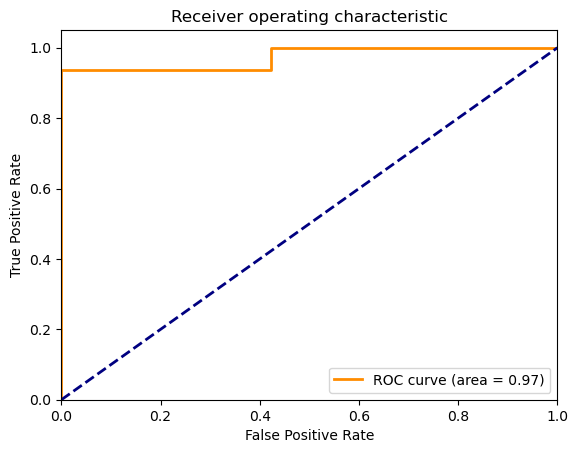

交叉验证得分：
[0.92       0.92       0.83333333 1.         0.95833333 1.
 0.95833333 0.95833333 0.91666667 0.875     ]
0.9339999999999999


In [15]:

model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("特征排序结果——————————————————————————————————————————————————")
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # 下标排序
for f in range(X_train.shape[1]):   # x_train.shape[1]=13
    print("%2d) %-*s %f" % \
          (f + 1, 30, selected_features[indices[f]], importances[indices[f]]))
predictions=model.predict(X_test)
cm = confusion_matrix(y_true=Y_test, y_pred=predictions)
calculate_all_prediction(cm)
calculae_lable_prediction(cm)
calculate_label_recall(cm)
y_score = model.predict_proba(X_test)
plotROC(3,Y_test,y_score[:,1])

scores = cross_val_score(model, X_train, Y_train, cv=10)  #cv为迭代次数。
print("交叉验证得分：")
print(scores)
print(scores.mean())